In [1]:
import uproot
import uproot_methods.classes.TLorentzVector as LVepm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import expon

In [86]:
#eventsData = uproot.open("/Users/jameskeaveney/UCT3rdYearLabs/UCT3rdYearLabATLASOpenData/data_Skim_GamGam.root")["mini"]
eventsData = uproot.open("data_Skim_GamGam.root")["mini"]

eventsData.show()
df = eventsData.pandas.df(["photon_pt", "photon_eta", "photon_phi", "photon_E",  "diphoton_mass"])


photon_pt                  (no streamer)              asdtype("('>f4', (2,))")
photon_eta                 (no streamer)              asdtype("('>f4', (2,))")
photon_phi                 (no streamer)              asdtype("('>f4', (2,))")
photon_E                   (no streamer)              asdtype("('>f4', (2,))")
diphoton_mass              (no streamer)              asdtype('>f4')


In [92]:
%%time
#this cell can take about 8-10 seconds to run

cuts0 = df[(df["photon_pt[0]"] > 35000)  & (df["photon_pt[1]"] > 25000 )]

cuts1 = cuts0[( np.abs(cuts0["photon_eta[0]"]) < 2.37)  & ( np.abs(cuts0["photon_eta[1]"]) < 2.37 )]

cuts1a = cuts1[ (np.abs(cuts1["photon_eta[0]"]) < 1.37) | (np.abs(cuts1["photon_eta[0]"]) > 1.52) ]

cuts1b = cuts1a[ (np.abs(cuts1a["photon_eta[1]"]) < 1.37) | (np.abs(cuts1a["photon_eta[1]"]) > 1.52) ]

cuts2a = cuts1b[(cuts1b["photon_pt[0]"] / cuts1b["diphoton_mass"])  > 0.35]

cuts2b = cuts2a[(cuts2a["photon_pt[1]"] / cuts2a["diphoton_mass"])  > 0.25]

cuts3 = cuts2b[(cuts2b["diphoton_mass"]  > 105000) & (cuts2b["diphoton_mass"]  < 160000) ]


#cuts7 = cuts6[np.sqrt(2.0*cuts6.photon_pt[0]*cuts6.photon_pt[1] * ( np.cosh(cuts6.photon_eta[0]-cuts6.photon_eta[1]) - np.cos(cuts6.photon_phi[0]-cuts6.photon_phi[1]))) > 105000]

#cuts8 = cuts7[np.sqrt(2.0*cuts7.photon_pt[0]*cuts7.photon_pt[1] * ( np.cosh(cuts7.photon_eta[0]-cuts7.photon_eta[1]) - np.cos(cuts7.photon_phi[0]-cuts7.photon_phi[1]))) < 160000]

finalData =  cuts3

print(len(finalData.index))

finalData

74415
CPU times: user 57.9 ms, sys: 13.3 ms, total: 71.2 ms
Wall time: 70.3 ms


,photon_pt[0],photon_pt[1],photon_eta[0],photon_eta[1],photon_phi[0],photon_phi[1],photon_E[0],photon_E[1],diphoton_mass
entry,,,,,,,,,
0,176121.156250,39629.144531,-0.833492,0.094703,-0.294239,0.567294,240922.312500,39806.988281,106420.710938
4,59702.843750,36279.230469,-0.496725,0.944734,-1.249765,1.442561,67220.937500,53709.812500,116489.304688
7,59590.574219,48349.218750,0.677454,1.657661,1.073675,-1.483528,73796.007812,131452.093750,116470.882812
9,73188.804688,62626.109375,-0.012039,-0.931096,0.486101,-2.276066,73194.109375,91791.382812,147763.281250
10,60071.027344,40881.761719,-2.054557,-0.305891,3.055348,1.028946,238227.640625,42809.355469,129235.617188
...,...,...,...,...,...,...,...,...,...
278883,97026.398438,36786.125000,-0.926381,-0.575954,-0.686652,2.690899,141723.406250,43058.070312,120506.843750
278884,61294.273438,35927.746094,0.444575,-1.290260,-2.913397,0.771639,67452.015625,70219.507812,128996.859375
278888,56698.496094,54673.269531,0.968195,-0.731186,-0.846178,2.167801,85415.046875,69951.195312,153864.140625


In [93]:
%%time
flatData0 = LVepm.TLorentzVectorArray.from_ptetaphi(finalData["photon_pt[0]"], finalData["photon_eta[0]"], finalData["photon_phi[0]"],finalData["photon_E[0]"])
flatData1 = LVepm.TLorentzVectorArray.from_ptetaphi(finalData["photon_pt[1]"], finalData["photon_eta[1]"], finalData["photon_phi[1]"],finalData["photon_E[1]"])

flatData = flatData0 + flatData1

CPU times: user 9.56 ms, sys: 21.7 ms, total: 31.2 ms
Wall time: 53.9 ms


CPU times: user 29.5 ms, sys: 5.39 ms, total: 34.9 ms
Wall time: 36.8 ms


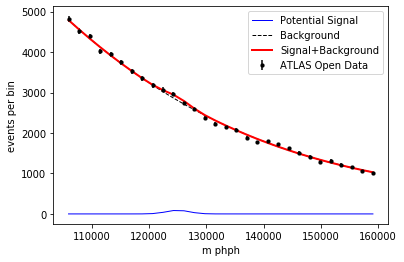

In [95]:
%%time
nBins = 30
minMass = 105000
maxMass = 160000

plt.figure()
plt.xlabel("m phph")
plt.ylabel("events per bin")
countsData, edges = np.histogram(flatData.mass, bins=nBins, range=(minMass,maxMass))
centres = (edges[1:] + edges[:-1]) / 2

# get the width of each bin
bin_width = edges[1] - edges[0]

# sum over number in each bin and mult by bin width, which can be factored out
integral = bin_width * sum(countsData[0:nBins])

b = np.poly1d(np.polyfit(centres, countsData, 3))

#guess a signal integral for illustration
integral = 450000.0
s = ( scipy.stats.norm.pdf(centres, 125000.0, 2000.0) * integral)

sb = s+b(centres)
plt.plot(centres, s, 'b', linewidth=1, label="Potential Signal")
plt.plot(centres, b(centres), 'k', linewidth=1, linestyle="--", label="Background")
plt.plot(centres, sb, 'r', linewidth=2, label="Signal+Background")

plt.errorbar(centres, countsData, yerr=np.sqrt(countsData), fmt='o', mfc='k', mec='k',ms=4, mew=0.2, ecolor='k',label="ATLAS Open Data",)
plt.legend()


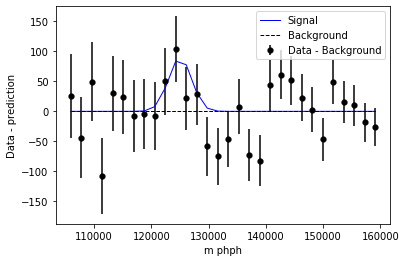

CPU times: user 251 ms, sys: 29.4 ms, total: 281 ms
Wall time: 285 ms


In [96]:
%%time
#ratio plot 
residuals = countsData - b(centres) 
plt.figure()
plt.xlabel("m phph")
plt.ylabel("Data - prediction")
plt.errorbar(centres, residuals, yerr=np.sqrt(countsData), label="Data - Background", fmt='o', mfc='k', mec='k', mew=0.2, ecolor='k')

#guess a signal integral for illustration
integral = 450000.0

plt.plot(centres, s, 'b', linewidth=1, label="Signal")
plt.plot(centres, np.zeros(len(centres)), 'k', linewidth=1, linestyle="--", label="Background")
plt.legend()

plt.show()